## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [247]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

# read and look at data
edu = pd.read_csv('https://raw.githubusercontent.com/wchen952/STAT-303-2-Project/main/data/xAPI-Edu-Data.csv')
edu

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Data quality check
*By Jason*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [248]:
# Check for any na values in the dataset
check_nan = edu.isna().sum()
print(check_nan)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [249]:
for i in edu:
    print(i,"\n", edu[i].unique())

gender 
 ['M' 'F']
NationalITy 
 ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth 
 ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID 
 ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID 
 ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID 
 ['A' 'B' 'C']
Topic 
 ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester 
 ['F' 'S']
Relation 
 ['Father' 'Mum']
raisedhands 
 [ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
VisITedResources 

In [250]:
# check the correlation between variables
edu.corr()

/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/1908083368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edu.corr()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


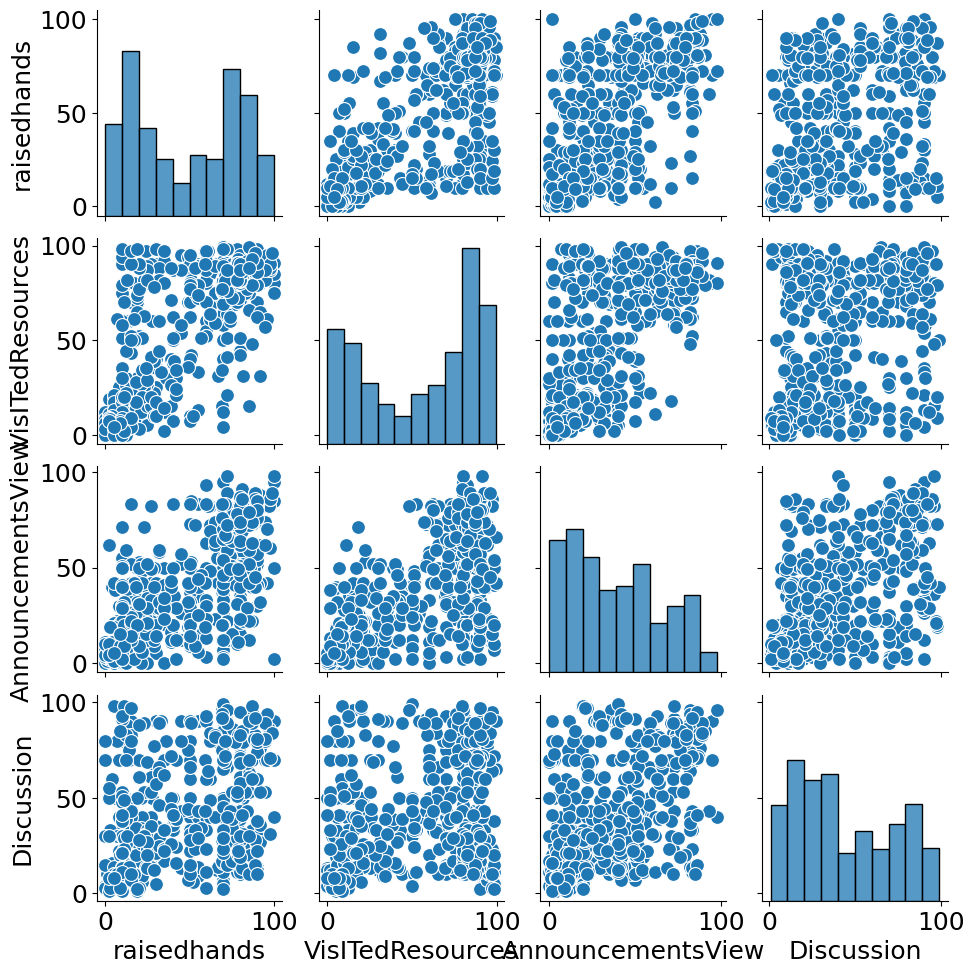

In [251]:
# adding pairplot to help with visualization
sns.pairplot(edu)

### Data cleaning
*By Marcelo Barillas*

From the data quality check we realized that: 
There thankfully wasn't any NA values. I needed to add a dataset that would serve as a testing dataset. It also showed that only a couple of variables were correlated. It also showed that the class variable had one too many values, meaning that we needed to drop one of them. A lot of columns weren't going to be useful either such as Place of Birth and other categorical variables in helping us answer our goal. These columns that were dropped could be useful in another larger dataset.

The code below implements the above cleaning.

In [252]:
#We realized that we needed to make a subset of the training dataset in order to make a feasable training and testing dataset
edu_train = edu.copy()
edu_train.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [253]:
# get two grades
edu_train = edu_train.loc[edu['GradeID'].isin(['G-07','G-08'])]
edu_train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [254]:
# drop stageID, sectionID, semester, relation, parentansweringsurvey, parentschoolsatisfaction, all values that were categorical were dropped 
edu_train = edu_train.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H


In [255]:
#we wanted to see the distribution of the topics to see if there were relatively well distributed
edu_train['Topic'].value_counts()

Biology      30
Arabic       28
Spanish      24
Chemistry    24
Geology      24
IT           21
Science      19
Quran        17
Math         16
History      12
English       2
Name: Topic, dtype: int64

In [256]:
# drop English topic because there are only two observations 
edu_train = edu_train[edu_train.Topic != 'English']
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [257]:
#applying the same logic from topics to class 
edu_train['Class'].value_counts()

M    101
H     62
L     52
Name: Class, dtype: int64

In [258]:
# drop low since we want to make a logistical regression and a binary response variable 
edu_train = edu_train[edu_train.Class != 'L']
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
11,M,G-07,Math,19,6,19,12,Under-7,M


In [259]:
#we needed a test day, so we used the sixth grade for data testing
edu_test = edu.copy()

# we subsetted the sixth grade
edu_test = edu_test.loc[edu_test['GradeID'].isin(['G-06'])]

In [260]:
#performing all the same changes we did to the last dataframe 
edu_test = edu_test.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_test = edu_test[edu_test.Class != 'L']

### Data preparation
*By Wendy Chen*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. After modifying the table, we can now prepare the data for models.

2. I changed the values of M and H to 0 and 1 respectively.

3. We also created a new dummy dataset in order to help us make a logistical regression for the useful categorical variables.

In [261]:
#This makes the class an official response variable
edu_train['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_train.head(5)

edu_test['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_test.head(5)

/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/1322520042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_train['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)


,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
15,F,G-06,IT,30,40,22,66,Under-7,0
245,F,G-06,IT,50,40,52,66,Under-7,0
246,F,G-06,Science,80,94,62,77,Under-7,1
247,F,G-06,Math,87,48,82,96,Above-7,0
264,F,G-06,English,70,64,42,32,Under-7,0


In [262]:
#In the idea that we want to prepare our data for subset selection, it was necessary to make sure that we can perform it using dummy variables
edutrain_dummies = pd.get_dummies(edu_train)
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G-07,GradeID_G-08,Topic_Arabic,...,Topic_Chemistry,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
7,50,10,15,22,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,12,21,16,50,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,70,80,25,70,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10,50,88,30,80,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
11,19,6,19,12,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [263]:
#since the names can cause problems in the regression process, I renamed them to be more model friendly
Y = [s.replace('-', '') for s in edutrain_dummies.columns.to_list()]
edutrain_dummies.columns = Y
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G07,GradeID_G08,Topic_Arabic,...,Topic_Chemistry,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above7,StudentAbsenceDays_Under7
7,50,10,15,22,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,12,21,16,50,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,70,80,25,70,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10,50,88,30,80,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
11,19,6,19,12,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [264]:
#utilizing the same methods of changing the edu_train dummies, we needed to do the same for the test 
edutest_dummies = pd.get_dummies(edu_test)
edutest_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G-06,Topic_English,Topic_IT,Topic_Math,Topic_Science,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
15,30,40,22,66,0,1,0,1,0,1,0,0,0,1
245,50,40,52,66,0,1,0,1,0,1,0,0,0,1
246,80,94,62,77,1,1,0,1,0,0,0,1,0,1
247,87,48,82,96,0,1,0,1,0,0,1,0,1,0
264,70,64,42,32,0,1,0,1,1,0,0,0,0,1


In [265]:
#since the names can cause problems in the regression process, I renamed them to be more model friendly
Y = [s.replace('-', '') for s in edutest_dummies.columns.to_list()]
edutest_dummies.columns = Y
edutest_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G06,Topic_English,Topic_IT,Topic_Math,Topic_Science,StudentAbsenceDays_Above7,StudentAbsenceDays_Under7
15,30,40,22,66,0,1,0,1,0,1,0,0,0,1
245,50,40,52,66,0,1,0,1,0,1,0,0,0,1
246,80,94,62,77,1,1,0,1,0,0,0,1,0,1
247,87,48,82,96,0,1,0,1,0,0,1,0,1,0
264,70,64,42,32,0,1,0,1,1,0,0,0,0,1


## Exploratory data analysis

In [266]:
# use vif to analyze continuous variables
continuous_vars = edu[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]

continuous_vars.columns[1:]

continuous_vars = add_constant(continuous_vars)
vif_data = pd.DataFrame()
vif_data["feature"] = continuous_vars.columns

for i in range(len(continuous_vars.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(continuous_vars.values, i)

print(vif_data)

             feature       VIF
0              const  5.248221
1        raisedhands  2.317627
2   VisITedResources  2.076660
3  AnnouncementsView  2.003386
4         Discussion  1.228993


All predictors have values less than 5, so do not need to get rid of any due to multicollinearity.

/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/2439554789.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edu_train.corr(), cmap = 'Blues')


<Axes: >

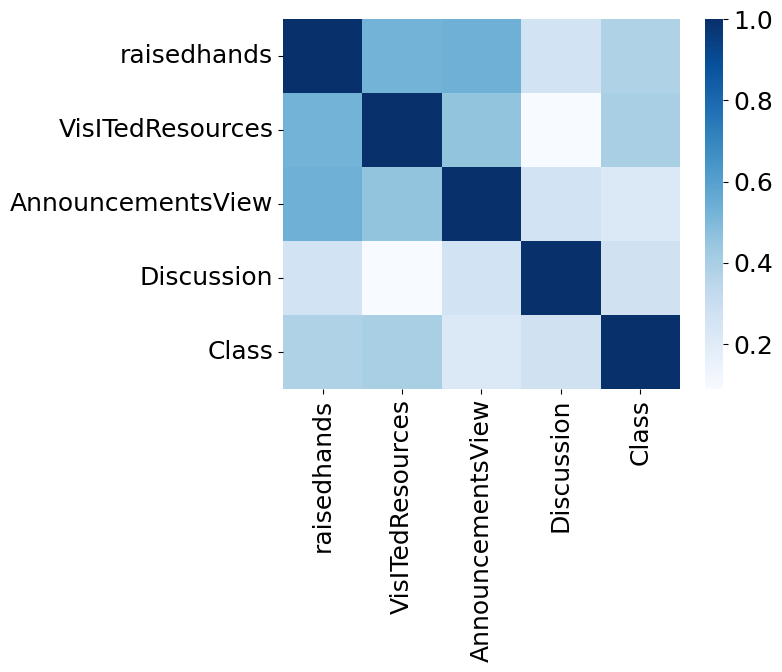

In [267]:
# correlation heatmap for predictors
sns.heatmap(edu_train.corr(), cmap = 'Blues')

## Developing the model

*By Phillip Meng and Marcelo Barillas*

In [268]:
# developing inital model with 6 predictors
model1 = smf.logit(formula = 'Class~gender+raisedhands+VisITedResources+AnnouncementsView+Discussion+StudentAbsenceDays', data = edu_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.442542
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      156
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.3338
Time:                        21:45:58   Log-Likelihood:                -72.134
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 1.395e-13
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.8299      1.708     -5.171      0.000     -12.177      -5.483
gender[T.M]                      -1.3045      0.476     -2.740      0.006      -2.238      -0.371
StudentAbsenceDays[T.Under-7]     2.2674      0.796      2.849      0.004       0.707       3.827
raisedhands                       0.0250      0.012      2.158      0.031       0.002       0.048
VisITedResources                  0.0550      0.017      3.148      0.002       0.021       0.089
AnnouncementsView                 0.0014      0.010      0.134      0.893      -0.019       0.021
Discussion                        0.0204      0.008      2.439      0.015       0.004       0.037
=================================================================================================
"""

In [269]:
# define function to compute confusion matrix and prediction accuracy on test/train data, 0.1 cutoff
def confusion_matrix_data(data,actual_values,model,cutoff=0.1):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 65.0%
Precision = 52.1%
TPR or Recall = 98.4%
FNR = 1.6%
FPR = 55.4%
ROC-AUC = 86.4%


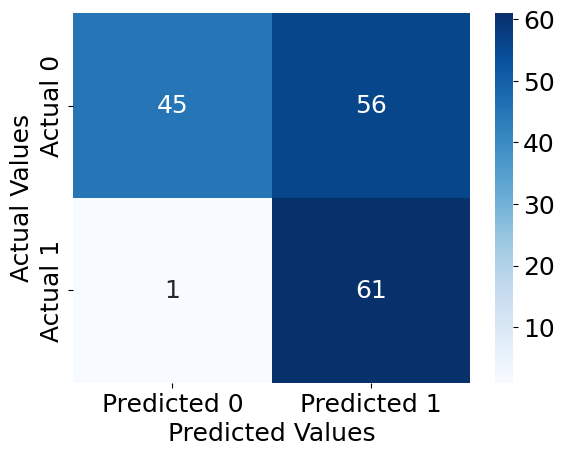

In [270]:
# running the confusion matrix
confusion_matrix_data(edu_train, edu_train.Class, model1)

In [271]:
pred_class = model1.predict(edu_test)

Classification accuracy = 70.0%
Precision = 64.7%
TPR or Recall = 78.6%
FNR = 21.4%
FPR = 37.5%
ROC-AUC = 82.1%


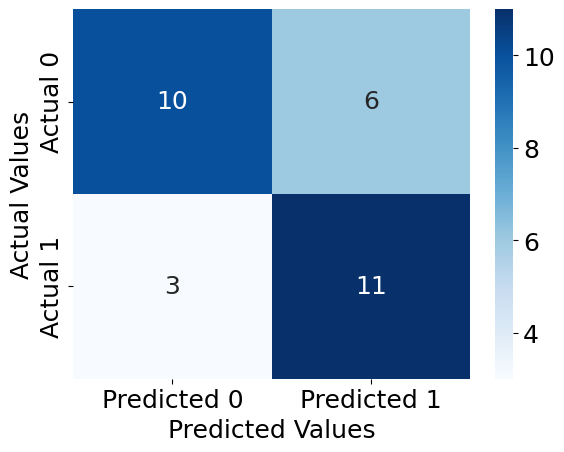

In [272]:
# running confusion matrix data with test data
confusion_matrix_data(edu_test, edu_test.Class, model1)

In [273]:
# second model, get rid of AnnouncementsView
model2 = smf.logit(formula = 'Class~gender+raisedhands+VisITedResources+Discussion+StudentAbsenceDays', data = edu_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.442597
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      157
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.3337
Time:                        21:46:03   Log-Likelihood:                -72.143
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 3.473e-14
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.8265      1.707     -5.170      0.000     -12.173      -5.481
gender[T.M]                      -1.2893      0.462     -2.792      0.005      -2.194      -0.384
StudentAbsenceDays[T.Under-7]     2.2531      0.789      2.856      0.004       0.707       3.799
raisedhands                       0.0255      0.011      2.340      0.019       0.004       0.047
VisITedResources                  0.0553      0.017      3.189      0.001       0.021       0.089
Discussion                        0.0207      0.008      2.523      0.012       0.005       0.037
=================================================================================================
"""

Classification accuracy = 65.0%
Precision = 52.1%
TPR or Recall = 98.4%
FNR = 1.6%
FPR = 55.4%
ROC-AUC = 86.4%


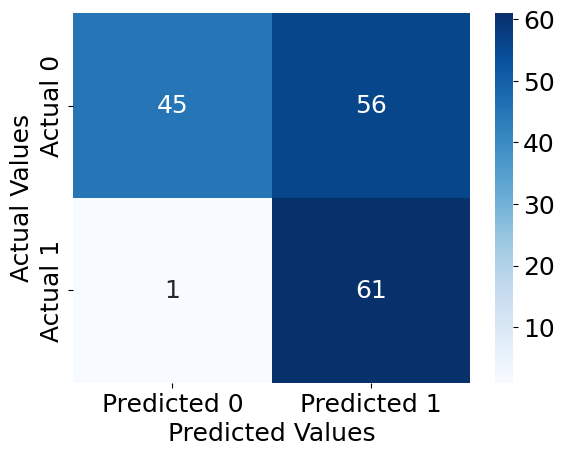

In [274]:
# running confusion matrix data with train data
confusion_matrix_data(edu_train, edu_train.Class, model2)

Classification accuracy = 70.0%
Precision = 64.7%
TPR or Recall = 78.6%
FNR = 21.4%
FPR = 37.5%
ROC-AUC = 81.2%


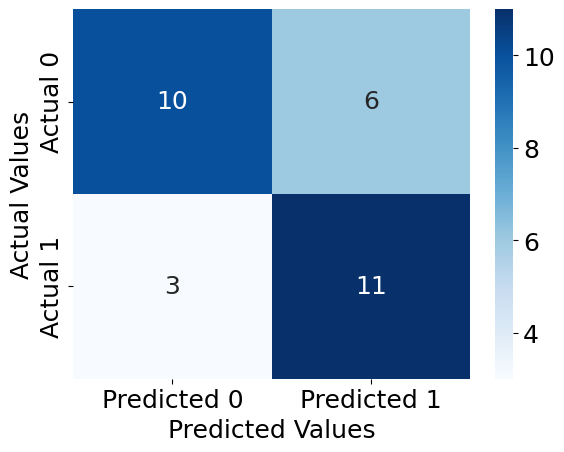

In [275]:
# running confusion matrix data with test data
confusion_matrix_data(edu_test, edu_test.Class, model2)

Similar results from model1.

In [276]:
# third model, want to see how gender interacts with class participation (discussion and raising hands)
model3 = smf.logit(formula = 'Class ~ gender*Discussion + gender*raisedhands + VisITedResources + StudentAbsenceDays', data = edu_train).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.428377
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      155
Method:                           MLE   Df Model:                            7
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.3551
Time:                        21:46:07   Log-Likelihood:                -69.825
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 5.915e-14
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.2303      1.925     -4.276      0.000     -12.003      -4.458
gender[T.M]                      -1.5007      1.709     -0.878      0.380      -4.851       1.850
StudentAbsenceDays[T.Under-7]     2.5501      0.838      3.045      0.002       0.909       4.192
Discussion                       -0.0025      0.014     -0.171      0.864      -0.031       0.026
gender[T.M]:Discussion            0.0358      0.018      1.962      0.050    4.13e-05       0.072
raisedhands                       0.0376      0.015      2.514      0.012       0.008       0.067
gender[T.M]:raisedhands          -0.0241      0.022     -1.108      0.268      -0.067       0.018
VisITedResources                  0.0488      0.017      2.806      0.005       0.015       0.083
=================================================================================================
"""

Classification accuracy = 67.5%
Precision = 54.1%
TPR or Recall = 96.8%
FNR = 3.2%
FPR = 50.5%
ROC-AUC = 87.7%


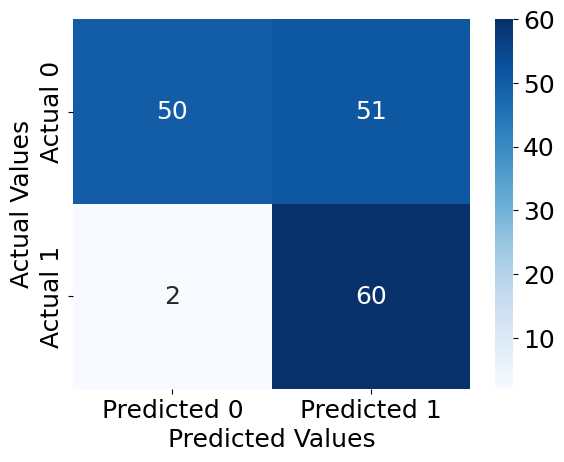

In [277]:
# matrix for train data - model3
confusion_matrix_data(edu_train, edu_train.Class, model3)

Classification accuracy = 73.3%
Precision = 68.8%
TPR or Recall = 78.6%
FNR = 21.4%
FPR = 31.2%
ROC-AUC = 81.2%


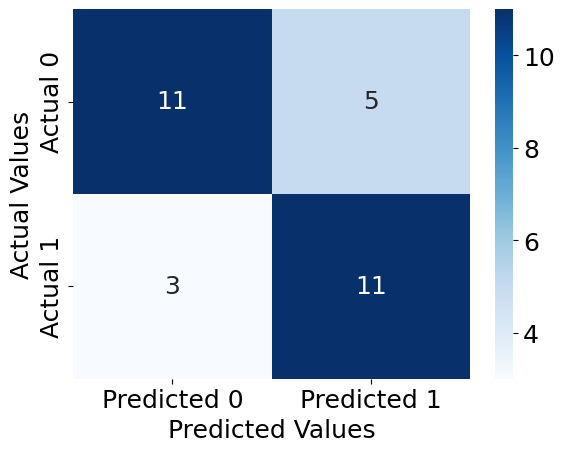

In [278]:
# matrix for test data - model3
confusion_matrix_data(edu_test, edu_test.Class, model3)

Model2 and Model3 similar performance, but model3 has some insignificant predictors. We can try running a forward selection with interactions.

In [407]:
# from model3, some predictors not significant, so use forward stepwise selection to select for best model
X = edutrain_dummies[['raisedhands', 'VisITedResources', 'Discussion', 'gender_F', 'StudentAbsenceDays_Above7']]
X_backup = edutrain_dummies[['raisedhands', 'VisITedResources', 'Discussion', 'gender_F', 'StudentAbsenceDays_Above7']]
X.head(5)


,raisedhands,VisITedResources,Discussion,gender_F,StudentAbsenceDays_Above7
7,50,10,22,0,0
8,12,21,50,1,0
9,70,80,70,1,0
10,50,88,80,0,0
11,19,6,12,0,0


In [408]:
# Including 2-factor interactions of predictors in train and 'X'
for combo in itertools.combinations(X_backup.columns, 2):    
    edutrain_dummies['_'.join(combo)] = edutrain_dummies[combo[0]]*edutrain_dummies[combo[1]]
    edutest_dummies['_'.join(combo)] = edutest_dummies[combo[0]]*edutest_dummies[combo[1]]
    X.loc[:,'_'.join(combo)] = edutrain_dummies.loc[:,'_'.join(combo)] 

/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/4016564596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = edutrain_dummies.loc[:,'_'.join(combo)]
/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/4016564596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = edutrain_dummies.loc[:,'_'.join(combo)]
/var/folders/rg/4sg2sg2n5d17g_zrymb0d2fw0000gn/T/ipykernel_88031/4016564596.py:5: SettingWithCopyWarning: 
A value is tryi

In [409]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    print(predictor_subset)
    model = smf.logit('Class~' + '+'.join(predictor_subset),data = edutrain_dummies).fit()
    Rsquared = model.llr_pvalue
    return {"model":model, "Rsquared":Rsquared}

In [410]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model
    
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

['raisedhands']
Optimization terminated successfully.
         Current function value: 0.582037
         Iterations 6
['VisITedResources']
Optimization terminated successfully.
         Current function value: 0.554142
         Iterations 7
['Discussion']
Optimization terminated successfully.
         Current function value: 0.626874
         Iterations 5
['gender_F']
Optimization terminated successfully.
         Current function value: 0.650362
         Iterations 4
['StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.603466
         Iterations 7
['raisedhands_VisITedResources']
Optimization terminated successfully.
         Current function value: 0.549259
         Iterations 6
['raisedhands_Discussion']
Optimization terminated successfully.
         Current function value: 0.570122
         Iterations 5
['raisedhands_gender_F']
Optimization terminated successfully.
         Current function value: 0.626039
         Iterations 5
['ra

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.603095
         Iterations 6
['raisedhands_StudentAbsenceDays_Above7', 'Discussion_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.607925
         Iterations 7
['raisedhands_StudentAbsenceDays_Above7', 'gender_F_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.609839
         Iterations 7
['VisITedResources_Discussion', 'VisITedResources_gender_F']
Optimization terminated successfully.
         Current function value: 0.531254
         Iterations 6
['VisITedResources_Discussion', 'VisITedResources_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.518410
         Iterations 7
['VisITedResources_Discussion', 'Discussion_gender_F']
Optimization terminated successfully.
         Current function value: 0.565948
         Iterations 5
['VisITedResources_Discussion', 

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.510880
         Iterations 7
['raisedhands', 'VisITedResources_gender_F', 'gender_F_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.529042
         Iterations 6
['raisedhands', 'VisITedResources_StudentAbsenceDays_Above7', 'Discussion_gender_F']
Optimization terminated successfully.
         Current function value: 0.516213
         Iterations 7
['raisedhands', 'VisITedResources_StudentAbsenceDays_Above7', 'Discussion_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.529212
         Iterations 7
['raisedhands', 'VisITedResources_StudentAbsenceDays_Above7', 'gender_F_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.511538
         Iterations 10
['raisedhands', 'Discussion_gender_F', 'Discussion_StudentAbsenceDays_Above7']
Optimization terminated successfully.
  

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [396]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [397]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    #print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

models_best_fwd = forward_selection()

['raisedhands']
Optimization terminated successfully.
         Current function value: 0.582037
         Iterations 6
['VisITedResources']
Optimization terminated successfully.
         Current function value: 0.554142
         Iterations 7
['Discussion']
Optimization terminated successfully.
         Current function value: 0.626874
         Iterations 5
['gender_F']
Optimization terminated successfully.
         Current function value: 0.650362
         Iterations 4
['StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.603466
         Iterations 7
['raisedhands_VisITedResources']
Optimization terminated successfully.
         Current function value: 0.549259
         Iterations 6
['raisedhands_Discussion']
Optimization terminated successfully.
         Current function value: 0.570122
         Iterations 5
['raisedhands_gender_F']
Optimization terminated successfully.
         Current function value: 0.626039
         Iterations 5
['ra

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'raisedhands_gender_F']
Optimization terminated successfully.
         Current function value: 0.594594
         Iterations 6
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'raisedhands_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.600611
         Iterations 7
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'VisITedResources_Discussion']
Optimization terminated successfully.
         Current function value: 0.561517
         Iterations 6
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'VisITedResources_gender_F']
Optimization terminated successfully.
         Current function value: 0.608573
         Iterations 5
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'VisITedResources_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.574477
         Iterations 10
['gender

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.470642
         Iterations 7
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'gender_F', 'Discussion_StudentAbsenceDays_Above7', 'VisITedResources_gender_F']
Optimization terminated successfully.
         Current function value: 0.552809
         Iterations 7
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'gender_F', 'Discussion_StudentAbsenceDays_Above7', 'VisITedResources_StudentAbsenceDays_Above7']
Optimization terminated successfully.
         Current function value: 0.569320
         Iterations 10
Processed  11 models on 5 predictors in 0.1107480525970459 seconds.
['gender_F_StudentAbsenceDays_Above7', 'Discussion_gender_F', 'gender_F', 'Discussion_StudentAbsenceDays_Above7', 'raisedhands_StudentAbsenceDays_Above7', 'raisedhands']
Optimization terminated successfully.
         Current function value: 0.501584
         Iterations 8
['gender_F_StudentAbsenceDays_Above7', 'Discussion

/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/marcelobarillas/miniconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [387]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Optimization terminated successfully.
         Current function value: 0.569916
         Iterations 10
Classification accuracy = 66.3%


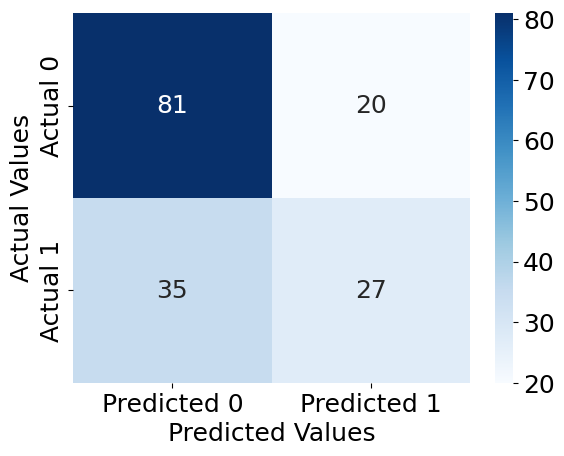

In [417]:
highest_val_model_all = smf.logit(formula = "Class~ gender_F_StudentAbsenceDays_Above7 + Discussion_gender_F + gender_F + VisITedResources_StudentAbsenceDays_Above7",data = edutrain_dummies).fit()

confusion_matrix_train(highest_val_model_all)

Optimization terminated successfully.
         Current function value: 0.576845
         Iterations 6
Classification accuracy = 72.4%


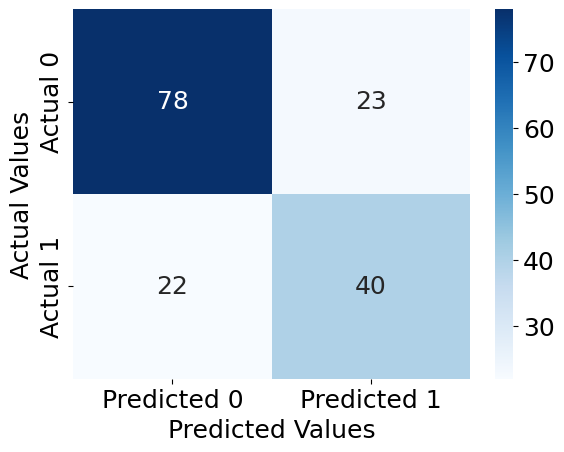

In [418]:
highest_val_model_ = smf.logit(formula = "Class~ raisedhands + gender_F_StudentAbsenceDays_Above7",data = edutrain_dummies).fit()

confusion_matrix_train(highest_val_model_)

In [419]:
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))

Classification accuracy = 66.7%


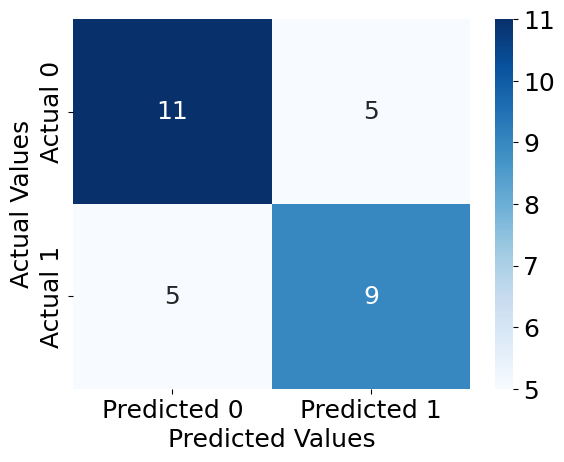

In [420]:
confusion_matrix_test(edutest_dummies,edutest_dummies.Class,highest_val_model_all)

Classification accuracy = 73.3%


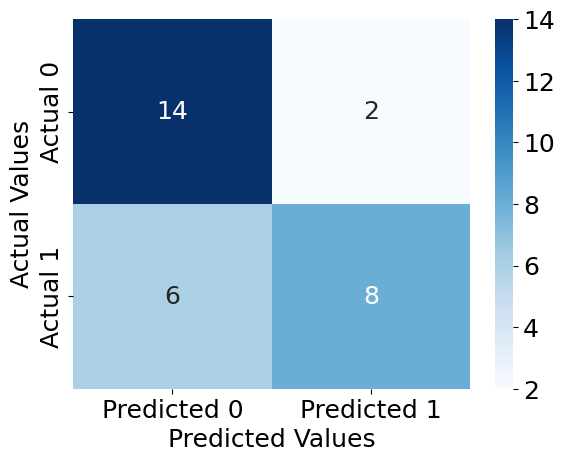

In [421]:
confusion_matrix_test(edutest_dummies,edutest_dummies.Class,highest_val_model_)

### Code fitting the final model

In [413]:
highest_val_model_all = smf.logit(formula = "Class~ raisedhands + gender_F_StudentAbsenceDays_Above7",data = edutrain_dummies).fit()

Optimization terminated successfully.
         Current function value: 0.576845
         Iterations 6
